# Logistic Regression Project

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

Let's import the common libraries we need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Load data in a DataFrame called ad_data:

In [2]:
ad_data = pd.read_csv('advertising.csv')

Let's view the head, info and description of the dataframe:

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis(EDA)

Age distribution using a histogram:

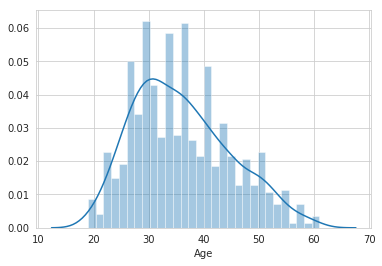

In [12]:
sns.set_style('whitegrid') #for cleaner plots
sns.distplot(ad_data['Age'], bins=30)

**Jointplot showing Area income vs Age:**

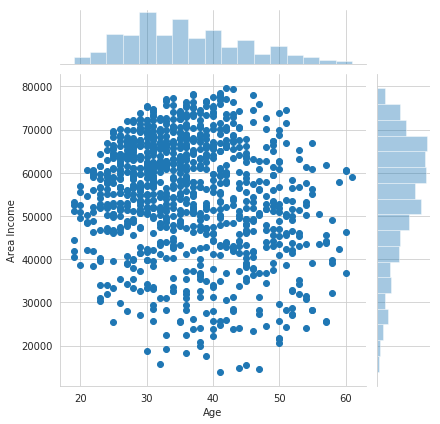

In [14]:
sns.jointplot(x='Age',y='Area Income', data=ad_data)

The same plot but of kind hex*

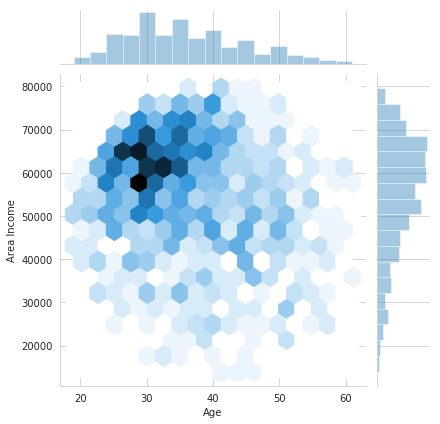

In [15]:
sns.jointplot(x='Age',y='Area Income', data=ad_data, kind='hex')

Jointplot showing the kde distributions of Daily Time Spent on Site vs. Age :

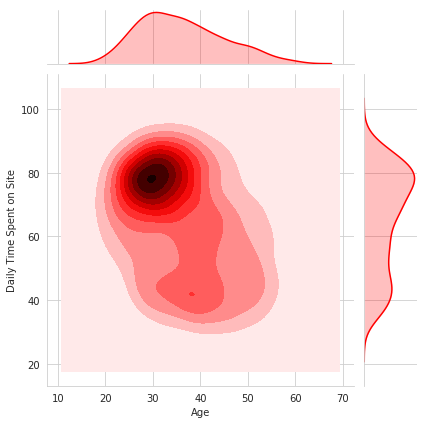

In [21]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde',color='red')

Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage' :


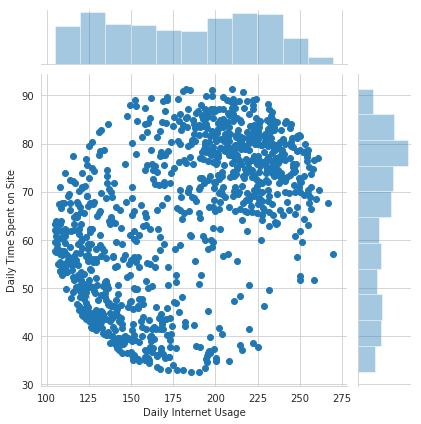

In [24]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data)

Pairplot to see relationship of every variable with the other :

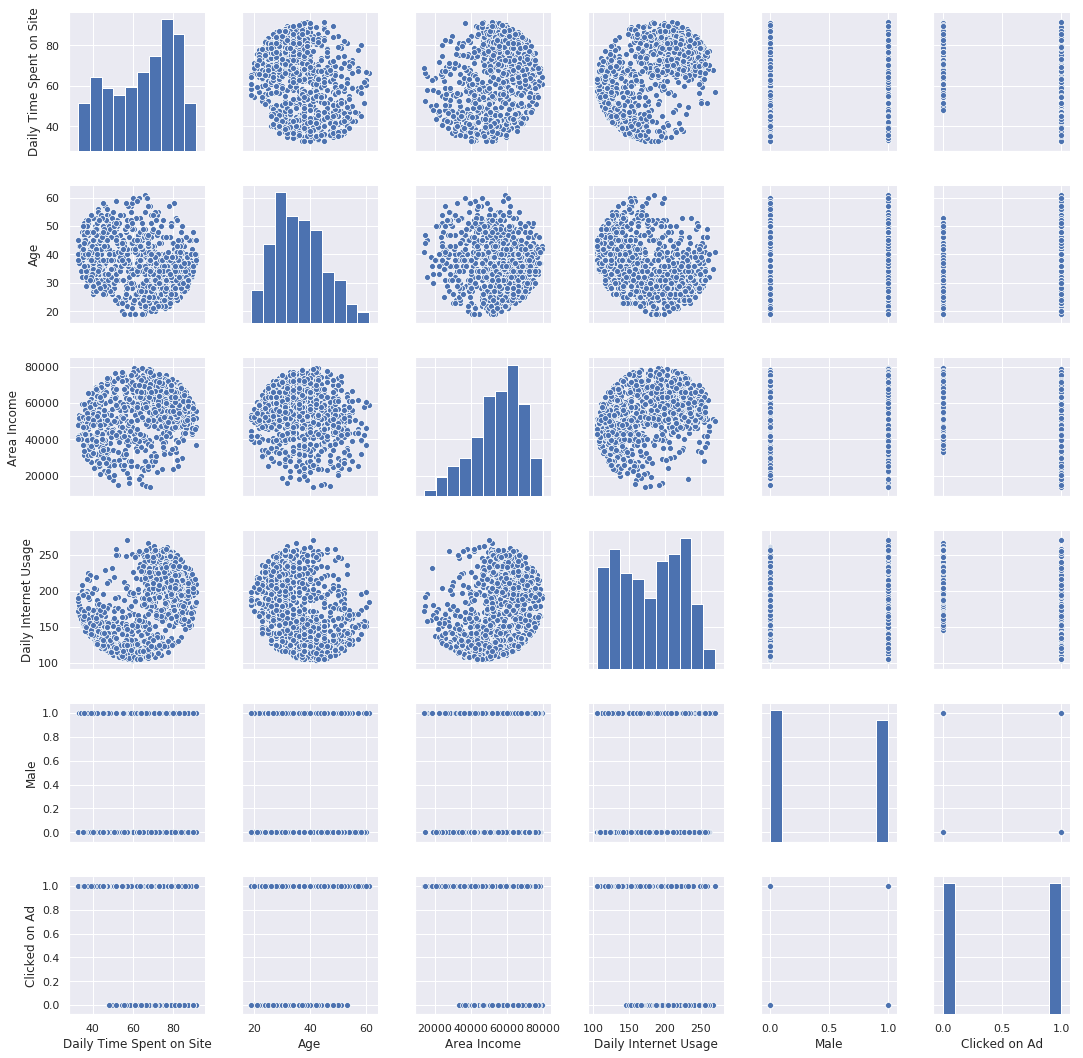

In [84]:
sns.pairplot(ad_data)

# Logistic Regression

Now let's do a train test split, and train our model!

Declare X and y.

Split the data into training set and testing set using train_test_split.

In [43]:
X = ad_data.drop(['Clicked on Ad', 'Timestamp', 'Ad Topic Line', 'City', 'Country'], axis=1)
y = ad_data['Clicked on Ad']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and evaluations

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[134  15]
 [ 19 132]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       149
           1       0.90      0.87      0.89       151

   micro avg       0.89      0.89      0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

